In [1]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from matplotlib.colors import Normalize

pd.set_option('display.max_columns', None)

In [2]:
fnames = glob.glob(os.path.expanduser('~/Downloads/redfin_2024*'))
df = pd.concat([pd.read_csv(f).drop(0) for f in fnames])
print([pd.read_csv(f).drop(0).shape for f in fnames])

[(349, 27), (302, 27), (322, 27), (233, 27), (346, 27)]


In [3]:
df.shape


(1552, 27)

In [4]:
df['PROPERTY TYPE'].value_counts()

PROPERTY TYPE
Single Family Residential    968
Condo/Co-op                  336
Townhouse                    120
Vacant Land                   96
Multi-Family (2-4 Unit)       24
Multi-Family (5+ Unit)         6
Other                          2
Name: count, dtype: int64

<Axes: >

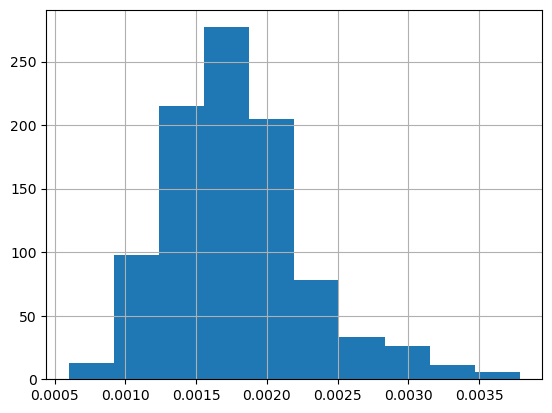

In [5]:
tmp = df.loc[df['PROPERTY TYPE']=='Single Family Residential']
# tmp['SQUARE FEET'].hist()
(tmp['BEDS'] / tmp['SQUARE FEET']).hist()

In [6]:
df.groupby('PROPERTY TYPE').count()

,SALE TYPE,SOLD DATE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
PROPERTY TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,
Condo/Co-op,336,170,336,336,336,336,336,315,315,230,315,0,315,60,315,226,230,1,1,336,230,230,336,336,336,336
Multi-Family (2-4 Unit),24,0,24,24,24,24,24,24,24,24,9,15,17,24,9,0,24,0,0,24,24,24,24,24,24,24
Multi-Family (5+ Unit),6,0,6,6,6,6,6,0,0,6,0,5,5,6,0,0,6,0,0,6,6,6,6,6,6,6
Other,2,0,2,2,2,2,2,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,2,2,2
Single Family Residential,968,619,968,968,968,968,964,962,962,920,962,860,875,302,962,191,921,8,8,968,921,921,968,968,968,968
Townhouse,120,70,120,120,120,120,120,120,120,117,120,3,120,47,120,101,117,0,0,120,117,117,120,120,120,120
Vacant Land,96,0,96,96,96,96,96,0,0,96,0,96,0,96,0,60,96,0,0,96,96,96,96,96,96,96


<Axes: >

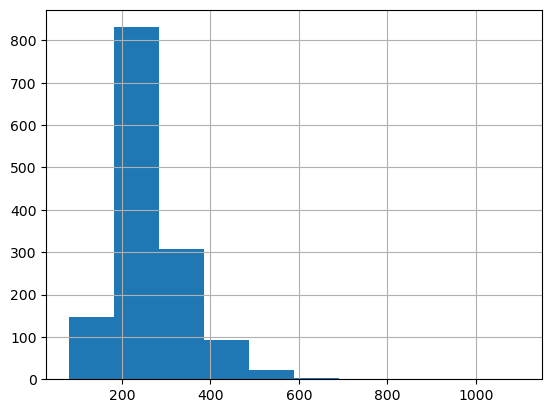

In [7]:
df['$/SQUARE FEET'].hist()

In [8]:
df['geometry'] = df.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.crs = "EPSG:4326"


In [9]:
gdf_lim = gdf.loc[gdf['$/SQUARE FEET']<600]

In [10]:
madison = gpd.read_file('~/Downloads/City_Limit/City_Limit.shp')


Text(0.5, 1.0, 'spring/summer 2024 all types')

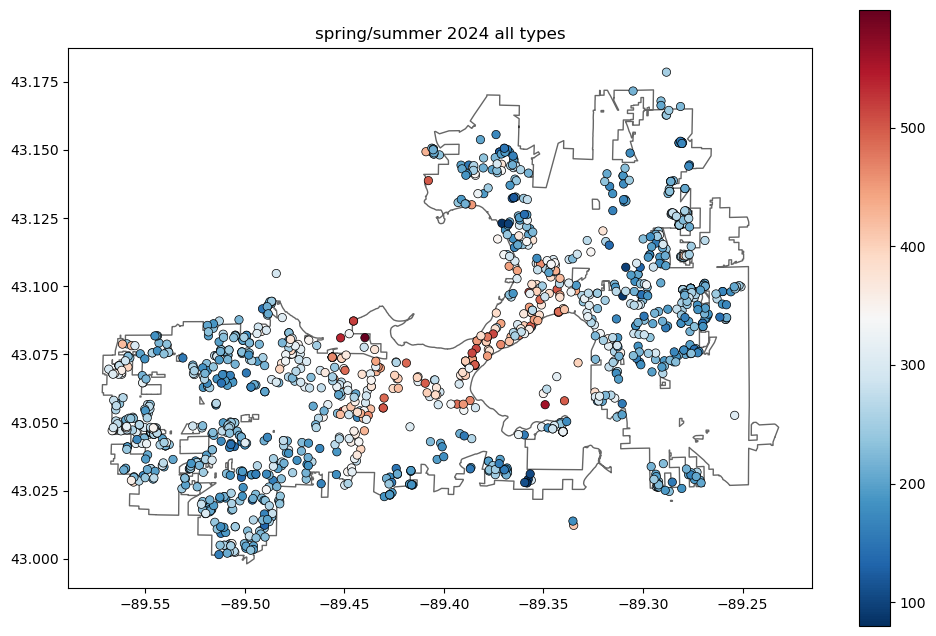

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

gdf_lim.plot(column='$/SQUARE FEET', ax=ax, legend=True,
          cmap='RdBu_r', edgecolor='black', linewidth=0.5)
plt.title('spring/summer 2024 all types')

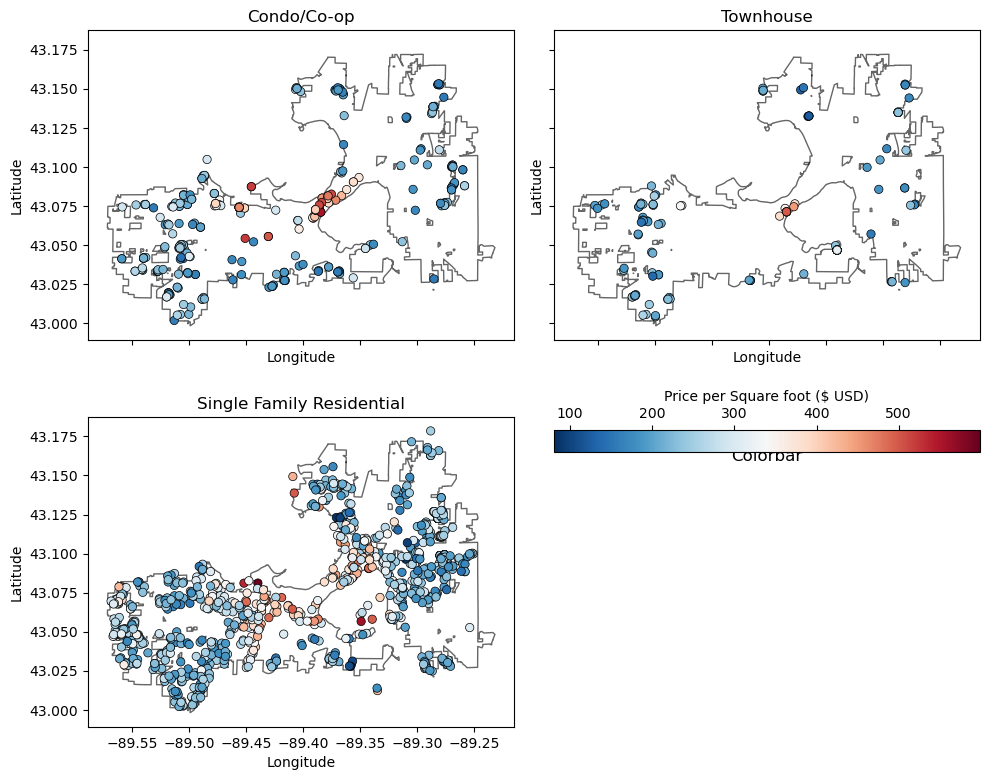

In [12]:
gdf_lim = gdf.loc[gdf['$/SQUARE FEET']<600]
subset_strings = ['Condo/Co-op','Townhouse','Single Family Residential']

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

# Define the color map
cmap = 'RdBu_r'

# Calculate global vmin and vmax for the colorbar
vmin = gdf_lim['$/SQUARE FEET'].min()
vmax = gdf_lim['$/SQUARE FEET'].max()

# Plot each subset in a different subplot
for i, ax in enumerate(axs.flat):
    if (i<3):
        madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)
        data_subset = gdf_lim.loc[gdf_lim['PROPERTY TYPE']==subset_strings[i]]
        data_subset.plot(column='$/SQUARE FEET', ax=ax, cmap=cmap, edgecolor='black', linewidth=0.5, vmin=vmin, vmax=vmax)
        ax.set_title(subset_strings[i])
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# Create a new axis for the colorbar (taking the place of the 4th subplot)
cbar_ax = axs.flat[3]  # Use the fourth subplot for the colorbar
cbar = fig.colorbar(sm, ax=cbar_ax, orientation='horizontal', location='top')
cbar.set_label('Price per Square foot ($ USD)')

# Remove the title from the fourth subplot (colorbar only)
cbar_ax.set_title('Colorbar')

# Hide the axes of the colorbar subplot for cleaner presentation
cbar_ax.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
# Define grid bounds and resolution
gdf_sfh = gdf_lim.loc[gdf_lim['PROPERTY TYPE']=='Single Family Residential']
x_min, y_min, x_max, y_max = gdf_sfh.total_bounds
resolution = 0.015  # Grid resolution in degrees

# Create mesh grid
x = np.arange(x_min, x_max, resolution)
y = np.arange(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

min_n = 2

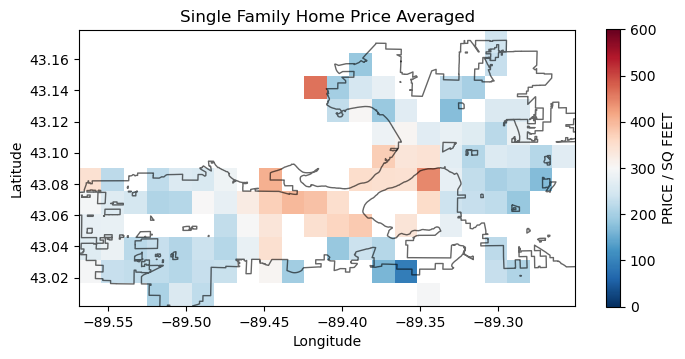

463.5


In [14]:
# Initialize grid values
grid_values = np.zeros(X.shape)
grid_values_count = np.zeros(X.shape)


# Assign point values to grid cells
for _, row in gdf_sfh.iterrows():
    x_idx = int((row.geometry.x - x_min) / resolution)
    y_idx = int((row.geometry.y - y_min) / resolution)
    if 0 <= x_idx < grid_values.shape[1] and 0 <= y_idx < grid_values.shape[0]:
        grid_values[y_idx, x_idx] += row['$/SQUARE FEET']
        grid_values_count[y_idx, x_idx] += 1
grid_values_count = np.where(grid_values_count == 0, 1, grid_values_count)
grid_values = grid_values/grid_values_count

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)

# Create a color mesh grid
norm = Normalize(vmin=0, vmax=600)
gv = np.where(grid_values_count < min_n, np.nan, grid_values)
gv_sfh = gv
cax = ax.imshow(gv, origin='lower', cmap=cmap, norm=norm,
                 extent=(x_min, x_max, y_min, y_max))

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('PRICE / SQ FEET')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Single Family Home Price Averaged')

plt.show()
print(np.nanmax(gv_sfh))

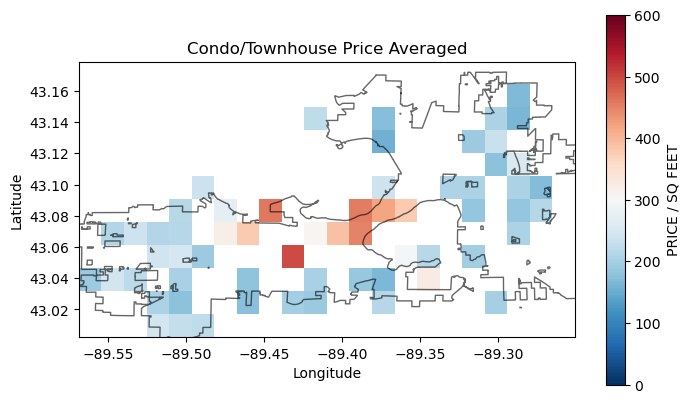

495.0


In [15]:
gdf_other = gdf_lim.loc[gdf_lim['PROPERTY TYPE'].isin(['Condo/Co-op','Townhouse'])]
# Initialize grid values
grid_values = np.zeros(X.shape)
grid_values_count = np.zeros(X.shape)


# Assign point values to grid cells
for _, row in gdf_other.iterrows():
    x_idx = int((row.geometry.x - x_min) / resolution)
    y_idx = int((row.geometry.y - y_min) / resolution)
    if 0 <= x_idx < grid_values.shape[1] and 0 <= y_idx < grid_values.shape[0]:
        grid_values[y_idx, x_idx] += row['$/SQUARE FEET']
        grid_values_count[y_idx, x_idx] += 1
grid_values_count = np.where(grid_values_count == 0, 1, grid_values_count)
grid_values = grid_values/grid_values_count

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)

# Create a color mesh grid
gv = np.where(grid_values_count < min_n, np.nan, grid_values)
gv_other = gv
cax = ax.imshow(gv, origin='lower', cmap=cmap, norm=norm,
                 extent=(x_min, x_max, y_min, y_max))

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('PRICE / SQ FEET')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Condo/Townhouse Price Averaged')

plt.show()
print(np.nanmax(gv_other))

(0.0, 600.0)

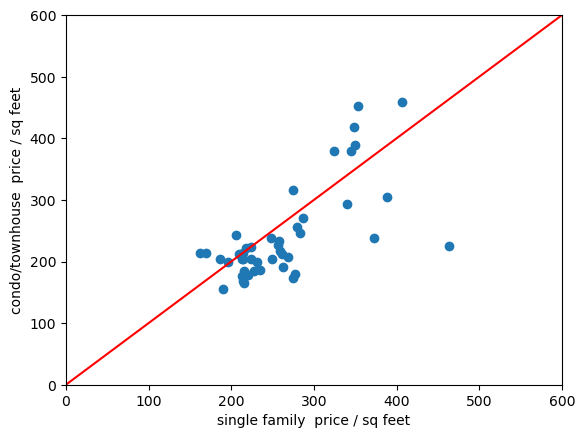

In [16]:
plt.scatter(gv_sfh.flatten(),gv_other.flatten())
plt.plot([0,600],[0,600],c='r')
plt.xlabel('single family  price / sq feet')
plt.ylabel('condo/townhouse  price / sq feet')
plt.ylim([0,600])
plt.xlim([0,600])


In [17]:
np.nanmax(gv_other), np.nanmax(gv_sfh)

(495.0, 463.5)

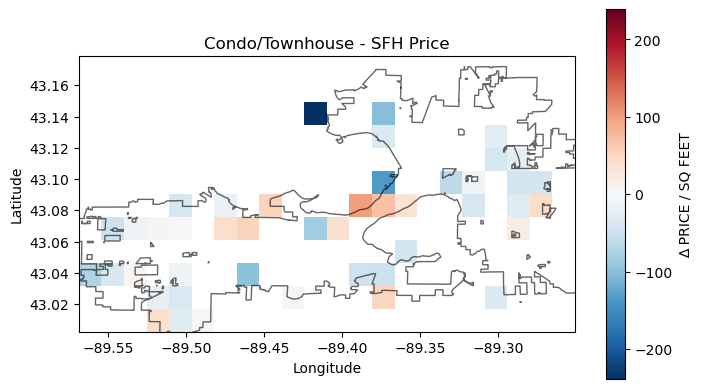

In [18]:
gdf_other = gdf_lim.loc[gdf_lim['PROPERTY TYPE'].isin(['Condo/Co-op','Townhouse'])]
# Initialize grid values
grid_values = np.zeros(X.shape)
grid_values_count = np.zeros(X.shape)


# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)

# Create a color mesh grid
tst = gv_other-gv_sfh
tstval = max(np.abs(np.nanmin(tst)),np.abs(np.nanmax(tst)))
tstnorm = Normalize(vmin=-tstval, vmax=tstval)

cax = ax.imshow(tst, origin='lower', cmap=cmap, norm=tstnorm,
                 extent=(x_min, x_max, y_min, y_max))

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('∆ PRICE / SQ FEET')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Condo/Townhouse - SFH Price')

plt.show()

In [19]:
df_lots = pd.concat([pd.read_csv('~/Downloads/lots_redfin_2024-07-29-18-52-32.csv').drop(0),
                     pd.read_csv('~/Downloads/lots_redfin_2024-07-29-17-55-45.csv').drop(0)])
df_lots = df_lots.drop_duplicates()
df_lots.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
1,PAST SALE,May-12-2023,Vacant Land,4843 Romaine Rd,Fitchburg,WI,53711.0,141000.0,NaN,NaN,Terravessa,NaN,8712.0,NaN,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Fitchburg/4843-Romai...,SCWMLS,1968881.0,N,Y,43.011315,-89.369852
2,PAST SALE,February-10-2023,Vacant Land,2910 Mizuna Dr,Fitchburg,WI,53711.0,82000.0,NaN,NaN,Terravessa,NaN,4356.0,NaN,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Fitchburg/2910-Mizun...,SCWMLS,1968760.0,N,Y,43.012504,-89.369877
3,PAST SALE,September-20-2021,Vacant Land,4878 Jicama Rd,Fitchburg,WI,53711.0,60000.0,NaN,NaN,Terravessa,NaN,3484.0,NaN,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/4878-Jicama-...,SCWMLS,1921919.0,N,Y,43.010195,-89.372175
4,PAST SALE,May-15-2023,Vacant Land,4851 Romaine Rd,Fitchburg,WI,53711.0,130000.0,NaN,NaN,Terravessa,NaN,8712.0,NaN,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Fitchburg/4851-Romai...,SCWMLS,1968766.0,N,Y,43.010953,-89.370676
5,PAST SALE,May-12-2023,Vacant Land,2922 Mizuna Dr,Fitchburg,WI,53711.0,82000.0,NaN,NaN,Terravessa,NaN,4356.0,NaN,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Fitchburg/2922-Mizun...,SCWMLS,1968769.0,N,Y,43.013085,-89.370773


(0.0, 500000.0)

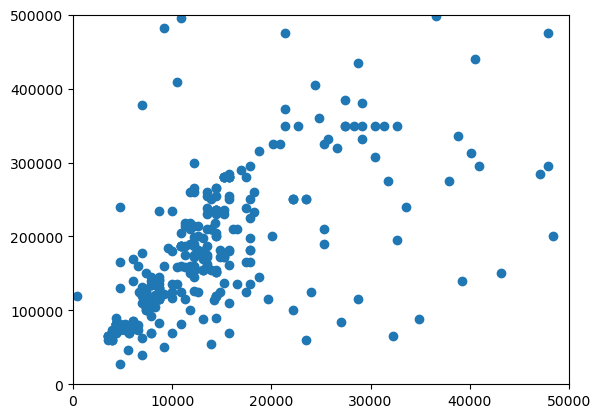

In [20]:
plt.scatter(df_lots['LOT SIZE'],df_lots['PRICE'])
plt.xlim([0,50000])
plt.ylim([0,500000])

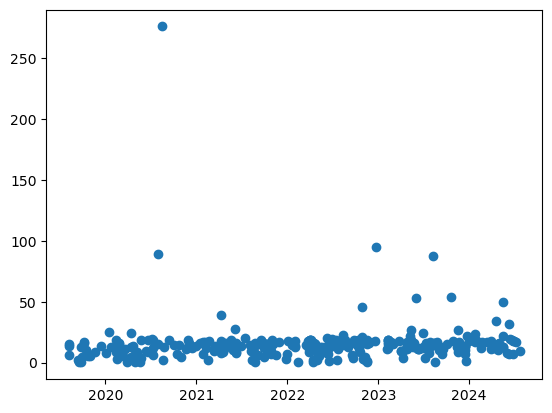

In [21]:
df_lots['PRICE/LOTSIZE'] = df_lots['PRICE']/df_lots['LOT SIZE']
df_lots['DATE'] = pd.to_datetime(df_lots['SOLD DATE'])
plt.scatter(df_lots['DATE'],df_lots['PRICE/LOTSIZE'])

In [22]:
df_lots['geometry'] = df_lots.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf_lots = gpd.GeoDataFrame(df_lots, geometry='geometry')
gdf_lots.crs = "EPSG:4326"


In [23]:
gdf_lots = gdf_lots.loc[gdf_lots['PRICE/LOTSIZE']<35]

<Axes: >

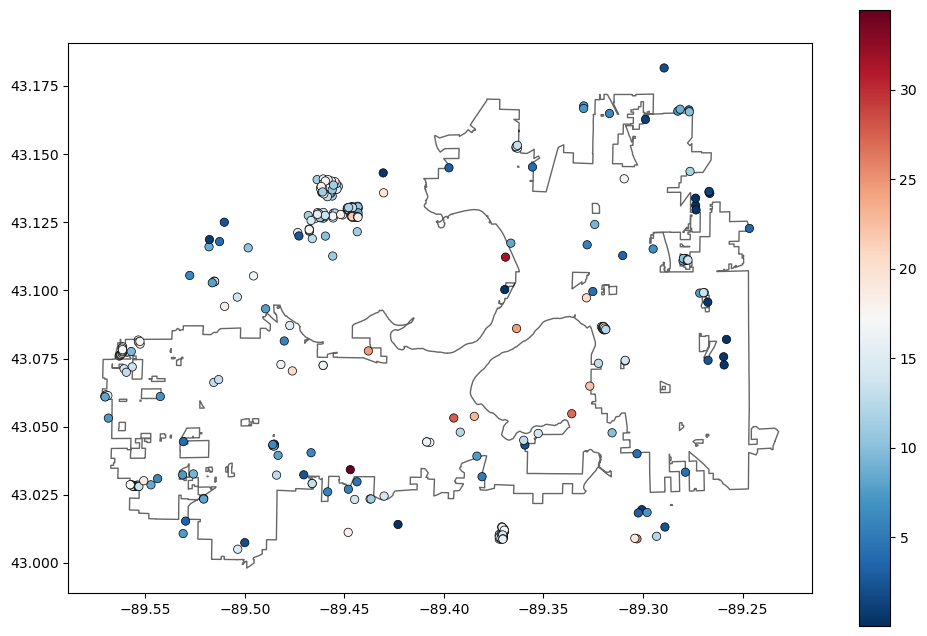

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

gdf_lots.plot(column='PRICE/LOTSIZE', ax=ax, legend=True,
          cmap='RdBu_r', edgecolor='black', linewidth=0.5)


In [25]:
gdf_lots['DATE'].max()

Timestamp('2024-07-22 00:00:00')

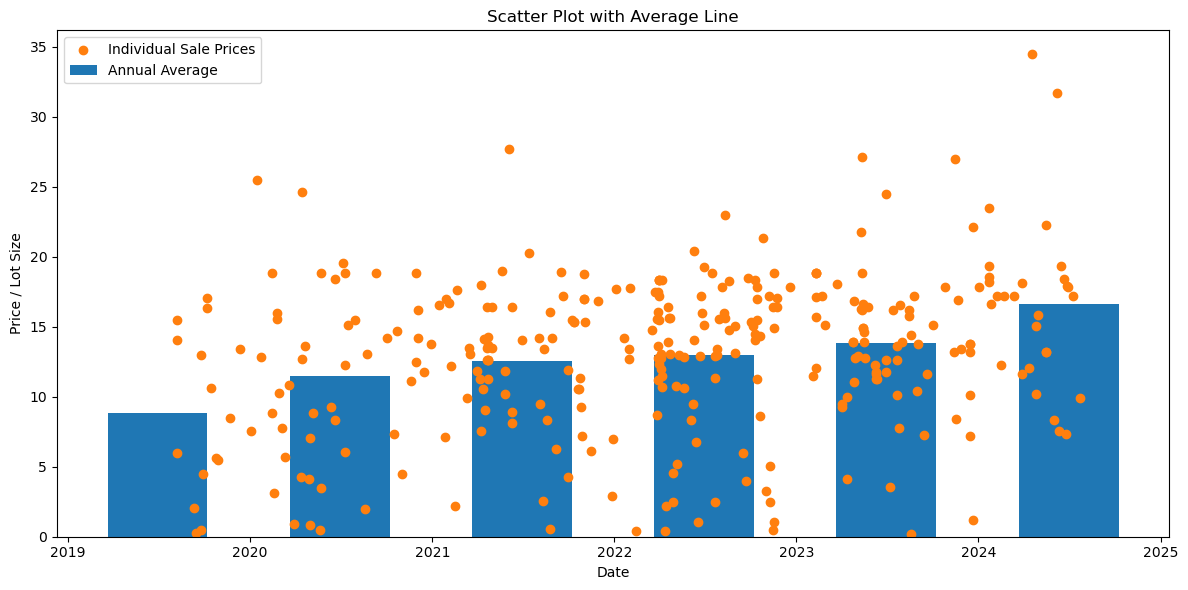

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
annual_avg = gdf_lots.groupby(pd.Grouper(key='DATE', freq='Y',label='right'))['PRICE/LOTSIZE'].mean().reset_index()
plt.bar(annual_avg['DATE']-pd.DateOffset(months=6),annual_avg['PRICE/LOTSIZE'],label='Annual Average',width=200)
plt.scatter(gdf_lots['DATE'],gdf_lots['PRICE/LOTSIZE'],label='Individual Sale Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price / Lot Size')
ax.set_title('Scatter Plot with Average Line')
ax.legend()

plt.tight_layout()  # Adjust layout to fit labels

plt.show()

In [27]:
annual_avg['ADJUSTMENT'] = annual_avg['PRICE/LOTSIZE'].max() - annual_avg['PRICE/LOTSIZE']

In [28]:
annual_avg

,DATE,PRICE/LOTSIZE,ADJUSTMENT
0,2019-12-31,8.847584,7.801718
1,2020-12-31,11.455247,5.194055
2,2021-12-31,12.534486,4.114815
3,2022-12-31,13.012506,3.636796
4,2023-12-31,13.846400,2.802902
5,2024-12-31,16.649302,0.000000


In [29]:
annual_avg['year'] = annual_avg['DATE'].dt.year
gdf_lots['year'] = gdf_lots['DATE'].dt.year

# Merge on the 'year' column
gdf_lots_adj = pd.merge(gdf_lots, annual_avg.drop(columns='PRICE/LOTSIZE'), on='year', how='inner')

In [30]:
gdf_lots_adj['ADJPRICE/LOTSIZE'] = gdf_lots_adj['PRICE/LOTSIZE'] + gdf_lots_adj['ADJUSTMENT']

<Axes: >

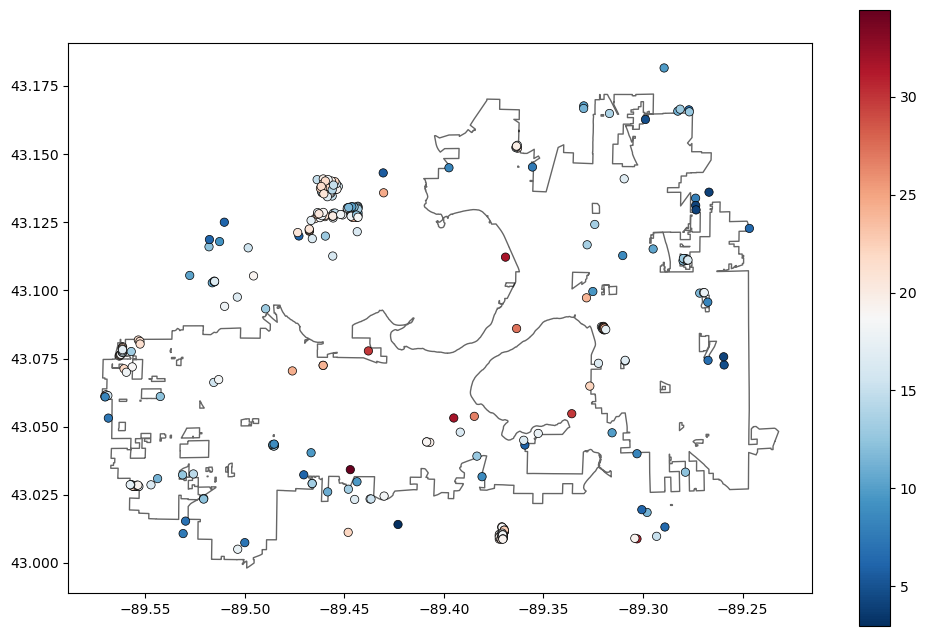

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

gdf_lots_adj.plot(column='ADJPRICE/LOTSIZE', ax=ax, legend=True,
          cmap='RdBu_r', edgecolor='black', linewidth=0.5)

In [32]:
# Define grid bounds and resolution
x_min, y_min, x_max, y_max = gdf_lots_adj.total_bounds
resolution = 0.04  # Grid resolution in degrees

# Create mesh grid
x = np.arange(x_min, x_max, resolution)
y = np.arange(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

min_n = 1

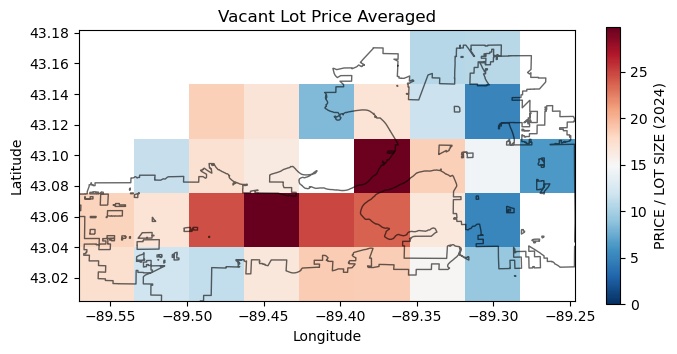

29.792283913154275


In [33]:
# Initialize grid values
grid_values = np.zeros(X.shape)
grid_values_count = np.zeros(X.shape)


# Assign point values to grid cells
for _, row in gdf_lots_adj.iterrows():
    x_idx = int((row.geometry.x - x_min) / resolution)
    y_idx = int((row.geometry.y - y_min) / resolution)
    if 0 <= x_idx < grid_values.shape[1] and 0 <= y_idx < grid_values.shape[0]:
        grid_values[y_idx, x_idx] += row['ADJPRICE/LOTSIZE']
        grid_values_count[y_idx, x_idx] += 1
grid_values_count = np.where(grid_values_count == 0, 1, grid_values_count)
grid_values = grid_values/grid_values_count

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)

cmap = 'RdBu_r'

# Create a color mesh grid
norm = Normalize(vmin=0, vmax=grid_values.max())
gv = np.where(grid_values == 0, np.nan, grid_values)
gv_sfh = gv
cax = ax.imshow(gv, origin='lower', cmap=cmap, norm=norm,
                 extent=(x_min, x_max, y_min, y_max))

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('PRICE / LOT SIZE (2024)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Vacant Lot Price Averaged')

plt.show()
print(np.nanmax(gv_sfh))

In [34]:
fnames = glob.glob(os.path.expanduser('~/Downloads/multredfin_2024*'))
df_m = pd.concat([pd.read_csv(f).drop(0) for f in fnames])

df_m = df_m.drop_duplicates()
print(df_m.shape)
df_m.head()

(973, 27)


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
1,PAST SALE,January-27-2020,Multi-Family (2-4 Unit),314 S Brooks St,Madison,WI,53715.0,482450.0,7.0,2.5,Madison,NaN,3920.0,1922.0,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/314-S-Brooks...,SCWMLS,1876139.0,N,Y,43.063630,-89.402687
2,PAST SALE,November-3-2021,Multi-Family (2-4 Unit),1022 W Badger Rd,Madison,WI,53713.0,475000.0,8.0,4.0,Burr Oaks,NaN,8712.0,1958.0,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/1022-W-Badge...,SCWMLS,1923320.0,N,Y,43.038793,-89.401079
3,PAST SALE,October-25-2022,Multi-Family (2-4 Unit),202 Swanton Rd,Madison,WI,53714.0,475000.0,8.0,6.0,Madison,NaN,NaN,1982.0,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/202-Swanton-...,SCWMLS,1945952.0,N,Y,43.102345,-89.302006
4,PAST SALE,February-21-2022,Multi-Family (5+ Unit),921 S Brooks St,Madison,WI,53715.0,1200000.0,NaN,NaN,Madison,NaN,12196.0,1957.0,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/921-S-Brooks...,SCWMLS,1929497.0,N,Y,43.057032,-89.400513
5,PAST SALE,November-10-2022,Multi-Family (2-4 Unit),110 S Broom St,Madison,WI,53703.0,550000.0,7.0,2.0,Madison,NaN,NaN,1904.0,NaN,NaN,NaN,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/110-S-Broom-...,SCWMLS,1942163.0,N,Y,43.070109,-89.387580


In [35]:
df_m['DATE'] = pd.to_datetime(df_m['SOLD DATE'])
df_m['YEAR'] = df_m['DATE'].dt.year
df_m['HOME AGE'] = df_m['DATE'].dt.year - df_m['YEAR BUILT']

In [36]:
df_m = df_m.dropna(subset=['LOT SIZE', 'HOME AGE', 'BEDS', 'PRICE', 'YEAR'])
df_m = df_m.loc[df_m['PRICE']<1250000]

In [37]:
import statsmodels.api as sm
import numpy as np

# Define the independent variables
X = df_m[[ 'BEDS',]]

# Add quadratic terms
# X['LOT_SIZE^2'] = X['LOT SIZE'] ** 2
# X['HOME_AGE^2'] = X['HOME AGE'] ** 2
# X['BEDS^2'] = X['BEDS'] ** 2

# Add a constant for the intercept
# X = sm.add_constant(X)

# Define the dependent variable
y = df_m['PRICE']


In [38]:
# Fit the nonlinear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              4709.
Date:                Sun, 04 Aug 2024   Prob (F-statistic):                   1.83e-310
Time:                        12:57:52   Log-Likelihood:                         -9286.1
No. Observations:                 691   AIC:                                  1.857e+04
Df Residuals:                     690   BIC:                                  1.858e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

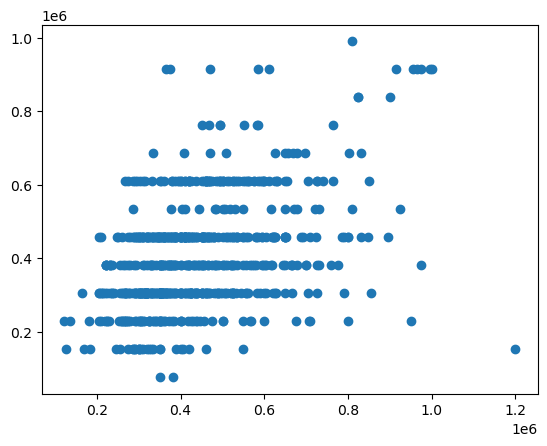

In [39]:
df_m['EXPLAINED PRICE'] = results.predict(X)
plt.scatter(df_m['PRICE'],df_m['EXPLAINED PRICE'])

<Axes: >

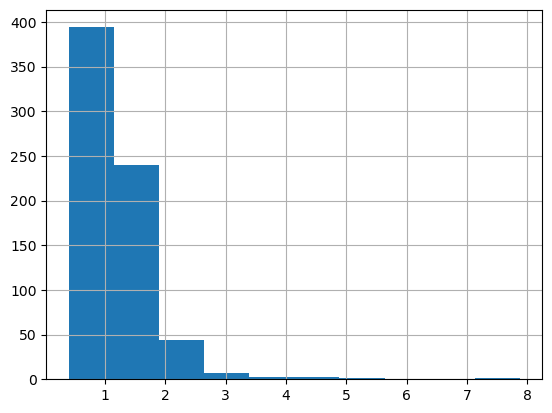

In [40]:
df_m['ADJPRICE'] = df_m['PRICE'] / df_m['EXPLAINED PRICE'] 
df_m['ADJPRICE'].hist()

In [41]:
df_m['geometry'] = df_m.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf_m = gpd.GeoDataFrame(df_m, geometry='geometry')
gdf_m.crs = "EPSG:4326"


<Axes: >

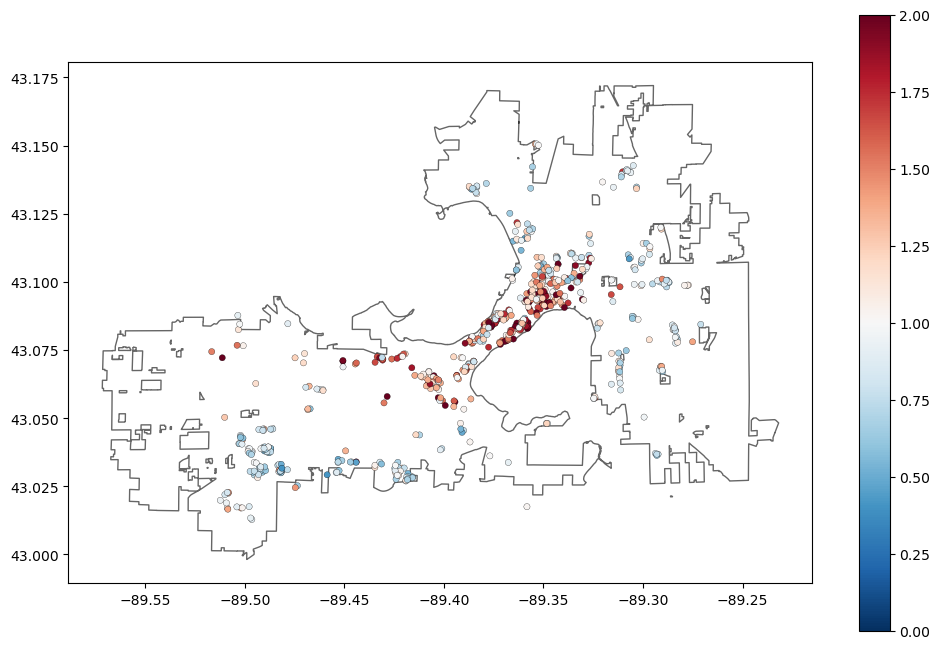

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

delt = 1#max(np.nanmax(gdf_m['ADJPRICE'])-1,1-np.nanmin(gdf_m['ADJPRICE']))
norm = Normalize(vmin=1-delt, vmax=1+delt)

gdf_m.plot(column='ADJPRICE', ax=ax, legend=True, norm=norm, markersize=20,
          cmap='RdBu_r', edgecolor='black', linewidth=0.2)

In [43]:
# Define grid bounds and resolution
x_min, y_min, x_max, y_max = gdf_m.total_bounds
resolution = 0.015  # Grid resolution in degrees

# Create mesh grid
x = np.arange(x_min, x_max, resolution)
y = np.arange(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

min_n = 4

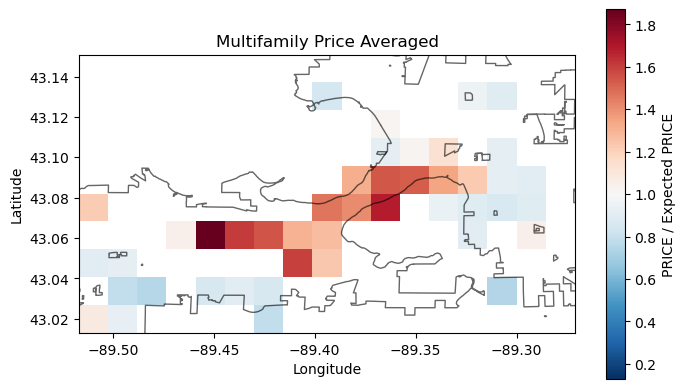

495.0


In [44]:
# Initialize grid values
grid_values = np.zeros(X.shape)
grid_values_count = np.zeros(X.shape)


# Assign point values to grid cells
for _, row in gdf_m.iterrows():
    x_idx = int((row.geometry.x - x_min) / resolution)
    y_idx = int((row.geometry.y - y_min) / resolution)
    if 0 <= x_idx < grid_values.shape[1] and 0 <= y_idx < grid_values.shape[0]:
        grid_values[y_idx, x_idx] += row['ADJPRICE']
        grid_values_count[y_idx, x_idx] += 1
grid_values_count = np.where(grid_values_count == 0, 1, grid_values_count)
grid_values = grid_values/grid_values_count

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)


# Create a color mesh grid
gv = np.where(grid_values_count < min_n, np.nan, grid_values)
delt = max(np.nanmax(gv)-1,1-np.nanmin(gv))
norm = Normalize(vmin=1-delt, vmax=1+delt)

gv_m = gv
cax = ax.imshow(gv, origin='lower', cmap=cmap, norm=norm,
                 extent=(x_min, x_max, y_min, y_max))

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('PRICE / Expected PRICE')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Multifamily Price Averaged')

plt.show()
print(np.nanmax(gv_other))

In [45]:
fnames = glob.glob(os.path.expanduser('~/Downloads/conredfin_2024*'))
df_con = pd.concat([pd.read_csv(f).drop(0) for f in fnames])

df_con = df_con.drop_duplicates()
print(df_con.shape)
df_con.head()

(3321, 27)


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
1,PAST SALE,September-8-2023,Condo/Co-op,360 W Washington Ave #1205,Madison,WI,53703.0,475000.0,2.0,2.0,Madison,1241.0,NaN,2003.0,NaN,383.0,469.0,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/360-W-Washin...,SCWMLS,1959285.0,N,Y,43.072012,-89.388435
2,PAST SALE,July-22-2020,Condo/Co-op,625 N Segoe Rd #511,Madison,WI,53705.0,425000.0,2.0,2.0,Madison,1721.0,NaN,2006.0,NaN,247.0,440.0,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/625-N-Segoe-...,SCWMLS,1883971.0,N,Y,43.073965,-89.456121
3,PAST SALE,October-18-2021,Condo/Co-op,625 N Segoe Rd #803,Madison,WI,53705.0,495000.0,1.0,2.0,Madison,1444.0,NaN,2006.0,NaN,343.0,471.0,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/625-N-Segoe-...,SCWMLS,1914212.0,N,Y,43.073965,-89.456121
4,PAST SALE,July-30-2021,Condo/Co-op,533 W Main St #312,Madison,WI,53703.0,458000.0,2.0,2.0,Madison,1419.0,NaN,2001.0,NaN,323.0,378.0,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/533-W-Main-S...,SCWMLS,1909219.0,N,Y,43.068386,-89.390567
5,PAST SALE,June-8-2022,Condo/Co-op,601 N Segoe Rd #306,Madison,WI,53705.0,425000.0,2.0,2.0,Madison,1720.0,NaN,1984.0,NaN,247.0,433.0,Sold,NaN,NaN,https://www.redfin.com/WI/Madison/601-N-Segoe-...,SCWMLS,1936643.0,N,Y,43.072696,-89.455924


In [46]:
df_con['DATE'] = pd.to_datetime(df_con['SOLD DATE'])
df_con['YEAR'] = df_con['DATE'].dt.year
df_con['HOME AGE'] = df_con['DATE'].dt.year - df_con['YEAR BUILT']

<Axes: >

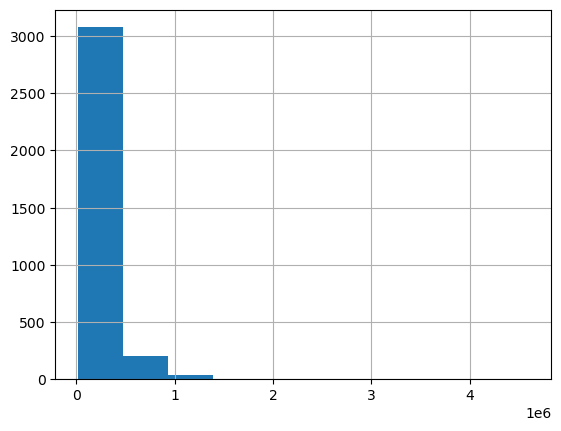

In [47]:
df_con['PRICE'].hist()

In [48]:
df_con = df_con.dropna(subset=['SQUARE FEET', 'HOME AGE', 'BEDS', 'PRICE', 'YEAR'])
df_con = df_con.loc[df_con['PRICE']<1250000]

In [49]:
import statsmodels.api as sm
import numpy as np

# Define the independent variables
X = df_con[['SQUARE FEET', 'HOME AGE', 'BEDS', 'YEAR']]

# Add quadratic terms
X['SQUARE_FEET^2'] = X['SQUARE FEET'] ** 2
X['HOME_AGE^2'] = X['HOME AGE'] ** 2
X['BEDS^2'] = X['BEDS'] ** 2

# Add a constant for the intercept
X = sm.add_constant(X)

# Define the dependent variable
y = df_con['PRICE']


/var/folders/jd/jd1qkkzn5rn0t4zkrk2n4mdm0000gn/T/ipykernel_28878/3743105120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SQUARE_FEET^2'] = X['SQUARE FEET'] ** 2
/var/folders/jd/jd1qkkzn5rn0t4zkrk2n4mdm0000gn/T/ipykernel_28878/3743105120.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['HOME_AGE^2'] = X['HOME AGE'] ** 2
/var/folders/jd/jd1qkkzn5rn0t4zkrk2n4mdm0000gn/T/ipykernel_28878/3743105120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [50]:
# Fit the nonlinear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     393.7
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:57:53   Log-Likelihood:                -29448.
No. Observations:                2257   AIC:                         5.891e+04
Df Residuals:                    2249   BIC:                         5.896e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.343e+07   3.38e+06    -15.820

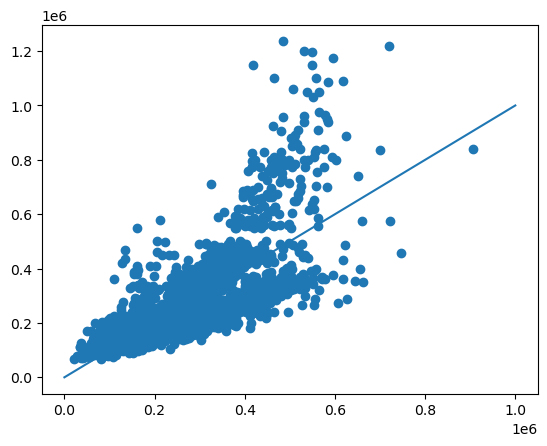

In [51]:
df_con['EXPLAINED PRICE'] = results.predict(X)
plt.scatter(df_con['EXPLAINED PRICE'],df_con['PRICE'])
plt.plot([0,1000000],[0,1000000])

In [52]:
square_feet = 1000
home_age = 20
beds = 3
year = 2024
chosen_X = X.iloc[0]
chosen_X['SQUARE FEET'] = square_feet
chosen_X['HOME AGE'] = home_age
chosen_X['BEDS'] = beds
chosen_X['SQUARE_FEET^2'] = square_feet**2
chosen_X['HOME_AGE^2'] = home_age**2
chosen_X['BEDS^2'] = beds**2
                
results.predict(chosen_X).values[0]

/var/folders/jd/jd1qkkzn5rn0t4zkrk2n4mdm0000gn/T/ipykernel_28878/4256281865.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_X['SQUARE FEET'] = square_feet
/var/folders/jd/jd1qkkzn5rn0t4zkrk2n4mdm0000gn/T/ipykernel_28878/4256281865.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_X['HOME AGE'] = home_age
/var/folders/jd/jd1qkkzn5rn0t4zkrk2n4mdm0000gn/T/ipykernel_28878/4256281865.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

250743.1776436672

<Axes: >

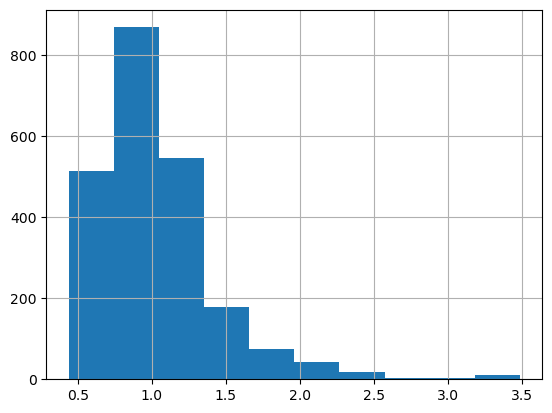

In [53]:
df_con['ADJPRICE'] = df_con['PRICE'] / df_con['EXPLAINED PRICE']
df_con['ADJPRICE'].hist()

In [54]:
df_con['geometry'] = df_con.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf_con = gpd.GeoDataFrame(df_con, geometry='geometry')
gdf_con.crs = "EPSG:4326"

<Axes: >

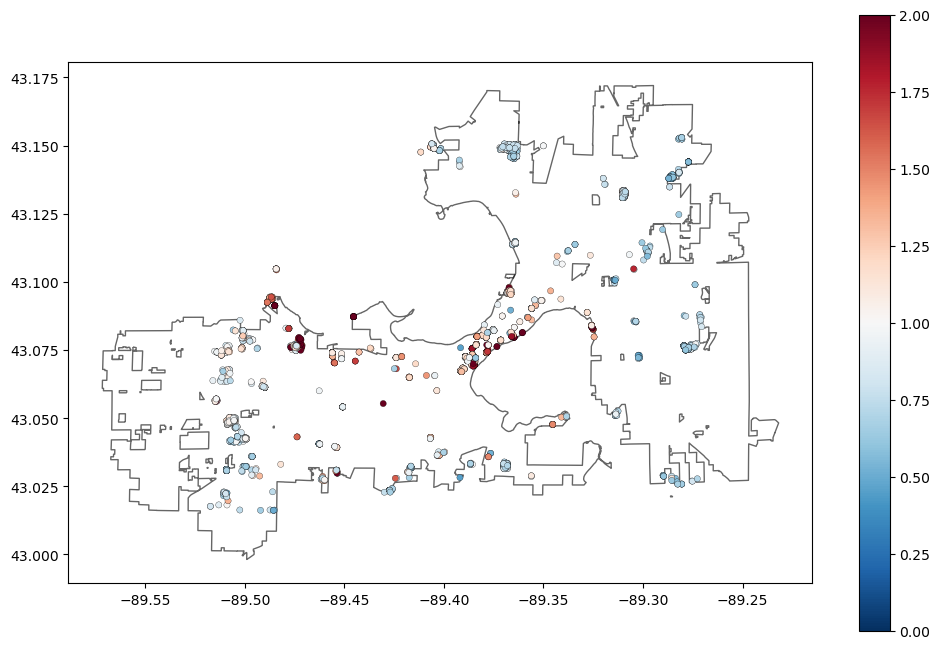

In [55]:
fig, ax = plt.subplots(figsize=(12, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

delt = 1#max(np.nanmax(gdf_m['ADJPRICE'])-1,1-np.nanmin(gdf_m['ADJPRICE']))
norm = Normalize(vmin=1-delt, vmax=1+delt)

gdf_con.plot(column='ADJPRICE', ax=ax, legend=True, norm=norm, markersize=20,
          cmap='RdBu_r', edgecolor='black', linewidth=0.2)

In [56]:
# Define grid bounds and resolution
x_min, y_min, x_max, y_max = gdf_con.total_bounds
resolution = 0.015  # Grid resolution in degrees

# Create mesh grid
x = np.arange(x_min, x_max, resolution)
y = np.arange(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

min_n = 4

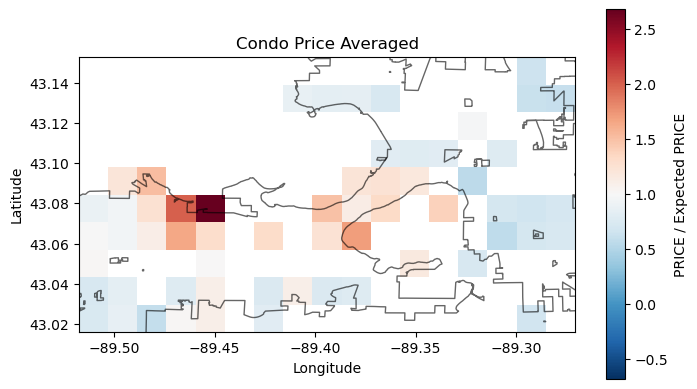

In [57]:
# Initialize grid values
grid_values = np.zeros(X.shape)
grid_values_count = np.zeros(X.shape)


# Assign point values to grid cells
for _, row in gdf_con.iterrows():
    x_idx = int((row.geometry.x - x_min) / resolution)
    y_idx = int((row.geometry.y - y_min) / resolution)
    if 0 <= x_idx < grid_values.shape[1] and 0 <= y_idx < grid_values.shape[0]:
        grid_values[y_idx, x_idx] += row['ADJPRICE']
        grid_values_count[y_idx, x_idx] += 1
grid_values_count = np.where(grid_values_count == 0, 1, grid_values_count)
grid_values = grid_values/grid_values_count

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)


# Create a color mesh grid
gv = np.where(grid_values_count < min_n, np.nan, grid_values)
delt = max(np.nanmax(gv)-1,1-np.nanmin(gv))
norm = Normalize(vmin=1-delt, vmax=1+delt)

gv_con = gv
cax = ax.imshow(gv, origin='lower', cmap=cmap, norm=norm,
                 extent=(x_min, x_max, y_min, y_max))

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', shrink=0.6)
cbar.set_label('PRICE / Expected PRICE')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Condo Price Averaged')

plt.show()


# ASSESSMENT DATA CALCULATOR

In [12]:
import pandas as pd
import geopandas as gpd
from shapely import wkb
from shapely.geometry import Point


import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [3]:
df_calc = pd.read_csv('~/Downloads/calculator_data.csv')
df_calc = df_calc.iloc[:,:-6]
df_geo = pd.read_csv('~/Downloads/housing_with_geo.csv')
madison = gpd.read_file('~/Downloads/City_Limit/City_Limit.shp')


In [4]:
df_tst = df_calc.merge(df_geo[['address','geometry']],on='address')
df_tst['geometry'] = df_tst['geometry'].apply(wkb.loads)
df_tst.head()


,address,current_property_use,current_total_living_area,current_stories,current_assessed_value,lot_depth,lot_width,lot_size,max_n_units,lot_size_max_n_units,...,Number of Units Fitting,Desired Parking / Unit,Total Parking,Parking Cost,Total,Square Footage Per Unit,Cost per Unit,Same Size Market Rate,Ratio,geometry
0,99 Sherman Ter,Condominium,0,0,0,750.00,600.00,403772.84,200.000000,269.181893,...,200,1,200,3000000,"$84,019,665",2000,"$420,098","$500,000",0.840197,MULTIPOLYGON (((-89.36865396499996 43.09582221...
1,409 Palomino Ln,Condominium,0,0,0,142.00,315.50,45150.55,30.100367,30.100367,...,30,1,30,450000,"$12,637,154",2000,"$421,238","$500,000",0.842477,MULTIPOLYGON (((-89.44360921899994 43.07123983...
2,3334 Ivy St,Vacant,0,0,49500,121.50,63.15,7578.00,5.052000,5.052000,...,5,1,5,75000,"$2,111,204",2000,"$422,241","$500,000",0.844482,MULTIPOLYGON (((-89.33298392999995 43.09806775...
3,3529 Graceland Ave,Vacant,0,0,57800,154.00,50.00,7700.00,5.133333,5.133333,...,5,1,5,75000,"$2,122,075",2000,"$424,415","$500,000",0.848830,MULTIPOLYGON (((-89.32710472099996 43.11690554...
4,1101 Gammon Ln,Vacant,0,0,160200,177.05,116.16,20566.00,12.000000,13.710667,...,12,1,12,180000,"$5,121,111",2000,"$426,759","$500,000",0.853518,MULTIPOLYGON (((-89.50253696299995 43.04217644...


In [5]:
gdf_tst = gpd.GeoDataFrame(df_tst,geometry='geometry')
gdf_tst['centroid'] = gdf_tst['geometry'].centroid
gdf_tst = gdf_tst.set_geometry('centroid')
gdf_tst['cost_per_unit'] = pd.to_numeric(gdf_tst['Cost per Unit'].str.replace('$', '').str.replace(',', ''))

<Axes: >

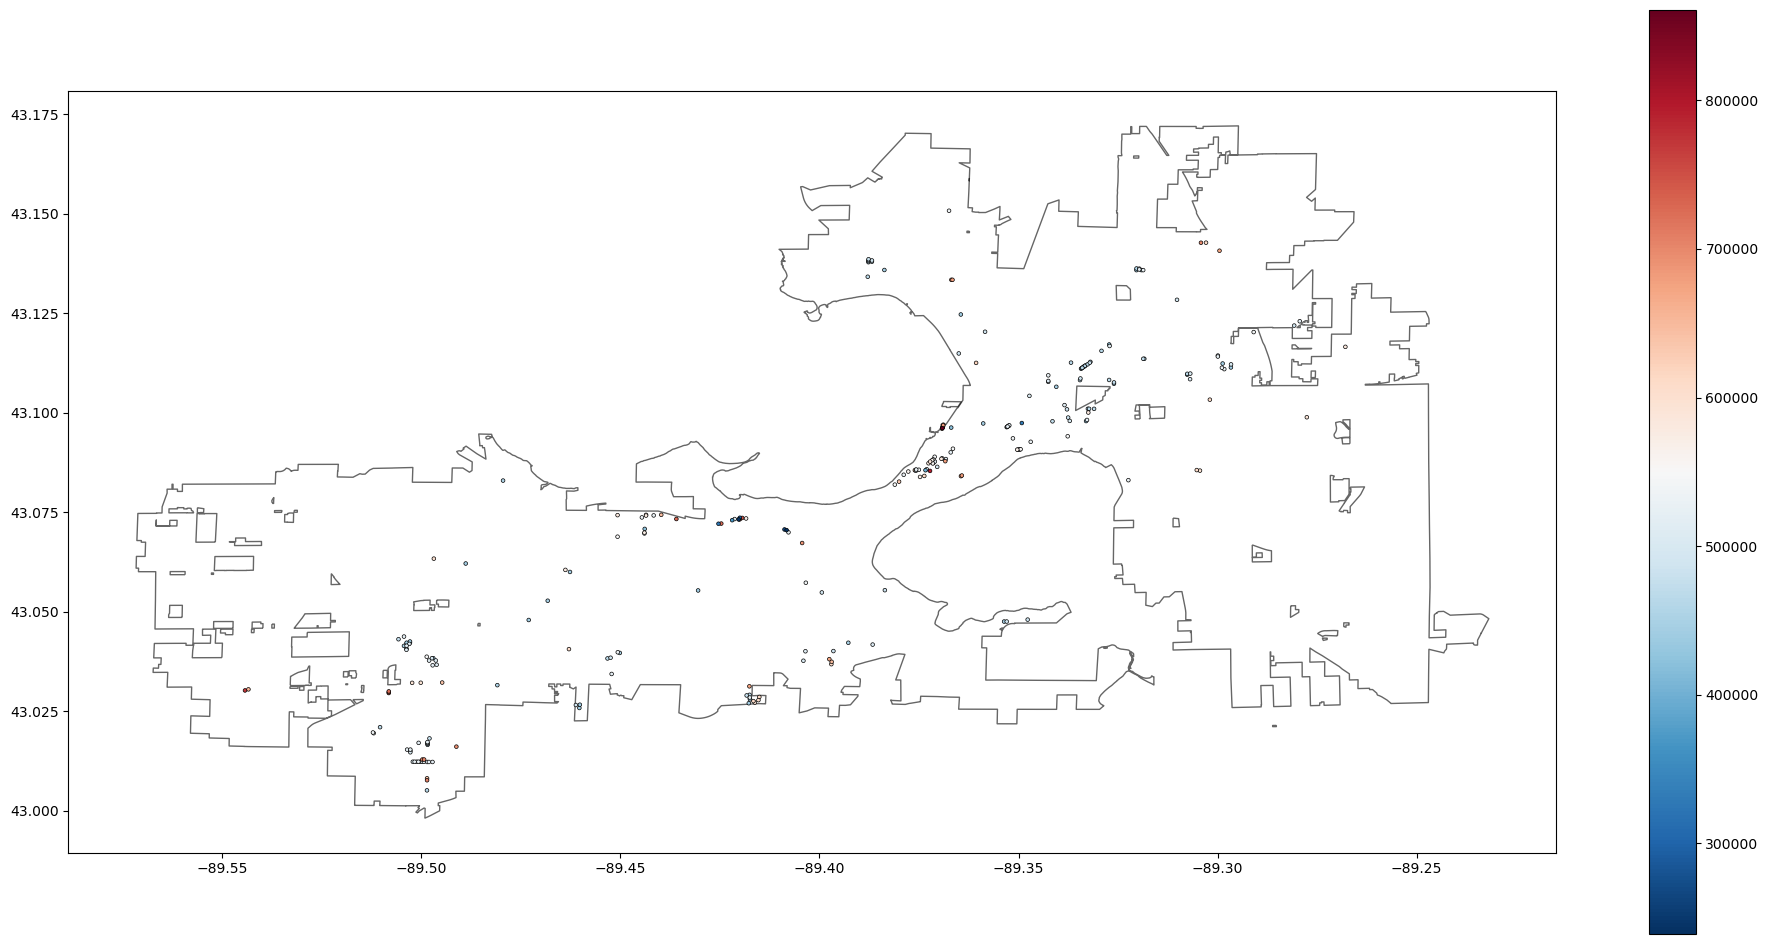

In [6]:

fig, ax = plt.subplots(figsize=(24, 12))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

gdf_tst.plot(column='cost_per_unit', ax=ax, legend=True,
          cmap='RdBu_r', edgecolor='black', linewidth=0.5, markersize=7)



<Axes: >

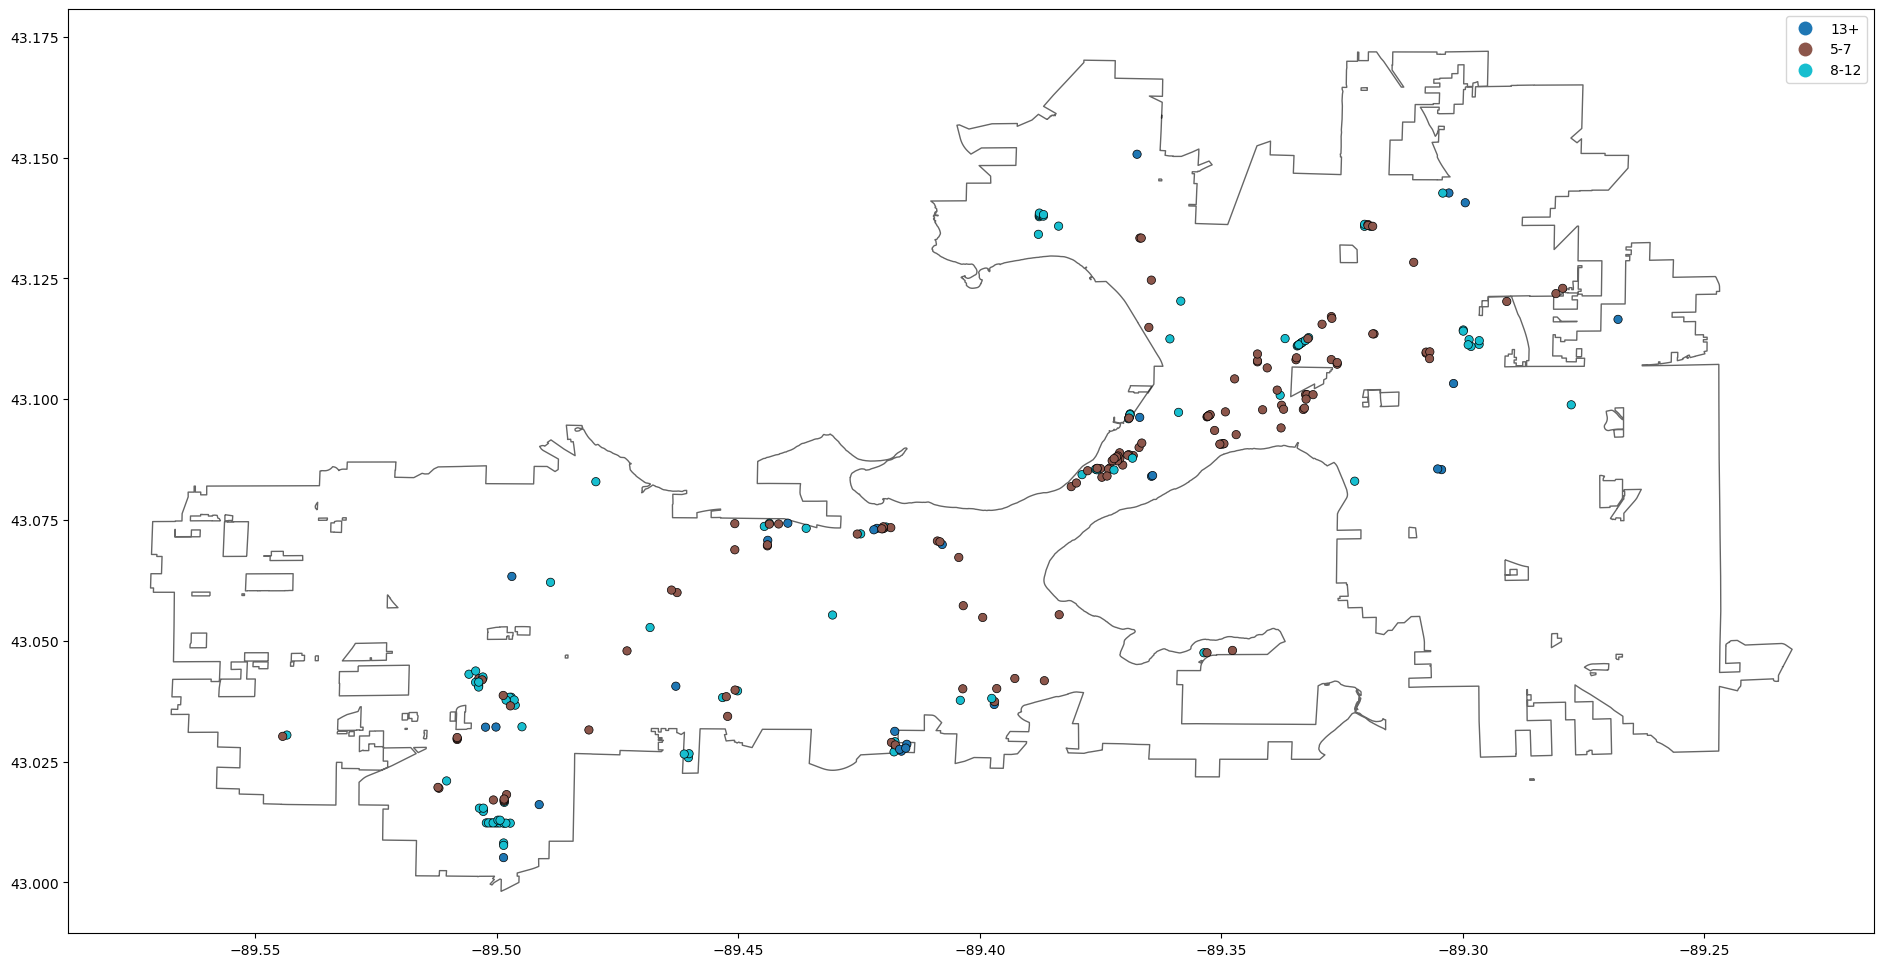

In [7]:
gdf_tst['Size Bin'] = gdf_tst['Number of Units Fitting'].apply(lambda x: '5-7' if x < 8 else '8-12' if x < 13 else '13+')

fig, ax = plt.subplots(figsize=(24, 12))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

gdf_tst.plot(column='Size Bin', ax=ax, legend=True, edgecolor='black', linewidth=0.5)



In [30]:
center = Point( -89.38436769096305, 43.074755497278375)
radius = 0.07

# Create a circle geometry using a buffer around the center point
circle = center.buffer(radius)

# Filter the GeoDataFrame to include only points within the circle
gdf_within_circle = gdf_tst.loc[gdf_tst['centroid'].within(circle)].copy()
gdf_within_circle['distance_to_capitol'] = gdf_within_circle['centroid'].distance(center)

<Axes: >

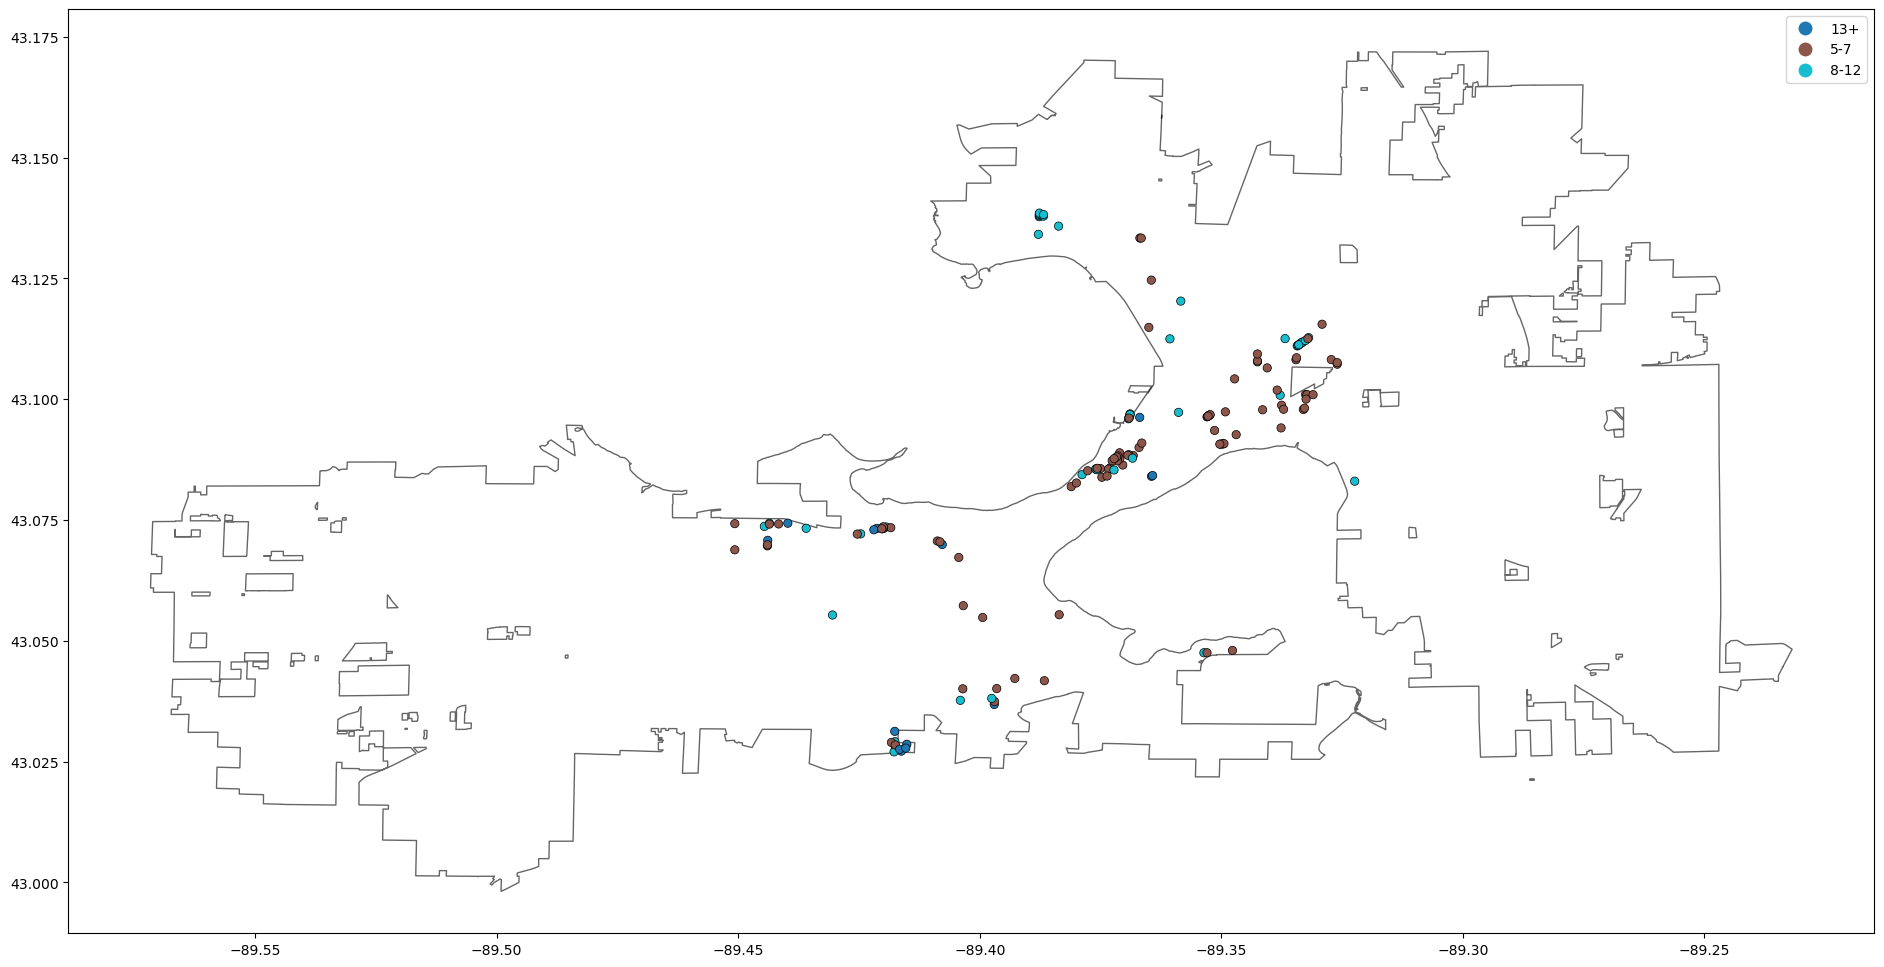

In [31]:
fig, ax = plt.subplots(figsize=(24, 12))
madison.plot(ax=ax, facecolor="none", edgecolor='black', alpha=0.6)  # Adjust color and transparency

gdf_within_circle.plot(column='Size Bin', ax=ax, legend=True, edgecolor='black', linewidth=0.5)


In [32]:
gdf_within_circle.to_csv('~/Downloads/calculator_data_geo.csv')

In [111]:
df_forsale = pd.concat([pd.read_csv('~/Downloads/forsale_redfin_2024-08-08-07-23-10.csv'),
           pd.read_csv('~/Downloads/forsale_redfin_2024-08-08-07-22-50.csv')])
df_forsale['geometry'] = df_forsale.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf_forsale = gpd.GeoDataFrame(df_forsale, geometry='geometry')
gdf_forsale.crs = "EPSG:4326"

In [43]:
gdf_merge = gdf_tst.set_geometry('geometry')
gdf_merge.crs = "EPSG:4326"
gdf_tst_forsale = gpd.sjoin(gdf_forsale, gdf_merge, how='inner', predicate='within')

In [46]:
gdf_tst_forsale[['ADDRESS','address']]

,ADDRESS,address
186,26 Deer Point Trl,7002 Raymond Rd
256,1101 Gammon Ln,1101 Gammon Ln


In [151]:
df_housing_updated = pd.read_csv('~/Downloads/housing_updated.csv')
df_housing_updated['geometry'] = df_housing_updated['geometry'].apply(wkb.loads)

gdf_hu = gpd.GeoDataFrame(df_housing_updated,geometry='geometry')
gdf_hu.crs = "EPSG:4326"
gdf_hu['centroid'] = gdf_hu['geometry'].to_crs(epsg=3071).centroid

center = gpd.GeoDataFrame(geometry=[Point( -89.38436769096305, 43.074755497278375)], crs="EPSG:4326").to_crs(epsg=3071)['geometry'].values[0]

gdf_hu['distance_to_capitol_miles'] = gdf_hu['centroid'].distance(center)*0.000621371


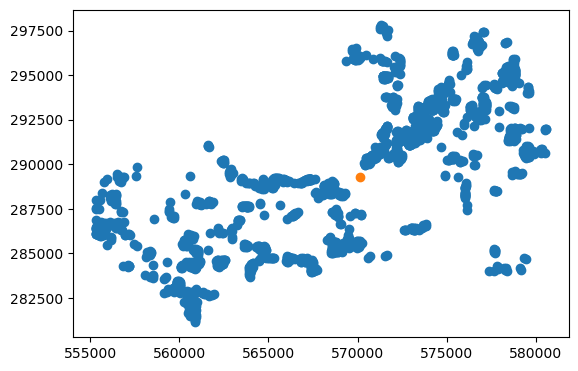

In [152]:
gdf_hu['centroid'].plot()
plt.scatter(center.x,center.y)

In [153]:
gdf_hu['latitude']=gdf_hu['geometry'].to_crs(epsg=3071).centroid.to_crs(epsg=4326).y
gdf_hu['longitude']=gdf_hu['geometry'].to_crs(epsg=3071).centroid.to_crs(epsg=4326).x
gdf_hu['side_of_town'] = gdf_hu['longitude'].apply(lambda x: 'E' if x>-89.38436769096305 else 'W')

In [154]:
gdf_forsale_lim = gdf_forsale.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)':'redfin_url',
                            'PRICE':'redfin_price',
                            'ADDRESS':'redfin_address'})

In [155]:
gdf_hu_forsale = gpd.sjoin(gdf_forsale_lim, gdf_hu, how='right', predicate='within')

In [156]:
gdf_hu_forsale = gdf_hu_forsale.drop(columns=['index_left', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE',
       'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 
       'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'])
gdf_hu_forsale['for_sale'] = gdf_hu_forsale['redfin_price'].notnull()

In [157]:
# Calculate the minimum oriented bounding box
def oriented_bbox(geom):
    # Get the minimum rotated bounding box
    min_rotated_box = geom.minimum_rotated_rectangle
    # Return the bounds of the minimum rotated bounding box
    return min_rotated_box.bounds

gdf_hu_forsale['oriented_bbox'] = gdf_hu_forsale['geometry'].to_crs(epsg=3071).apply(oriented_bbox)

# Extract width and length from oriented bounding box
def calculate_bbox_dimensions(bbox):
    minx, miny, maxx, maxy = bbox
    width = (maxx - minx)*3.28084
    length = (maxy - miny)*3.28084
    if length > width:
        return width, length
    else:
        return length, width

gdf_hu_forsale[['geom_lot_width_est','geom_lot_depth_est']] = gdf_hu_forsale['oriented_bbox'].apply(lambda bbox: pd.Series(calculate_bbox_dimensions(bbox)))


In [158]:
gdf_hu_forsale.columns

Index(['redfin_address', 'redfin_price', 'redfin_url', 'OBJECTID', 'parcel',
       'address', 'current_property_class', 'current_property_use',
       'current_year_built', 'current_total_living_area', 'current_stories',
       'current_assessed_value', 'lot_depth', 'lot_width', 'lot_size',
       'max_n_units', 'lot_size_max_n_units', 'zoning_max_n_units', 'zoning',
       'use', 'lot_minimum_per_du_sq_ft', 'lot_width_ft',
       'front_yard_setback_ft', 'side_yard_setback_ft', 'rear_yard_setback_ft',
       'reversed_corner_setback_ft', 'height_ft', 'lot_cvg_pct',
       'usable_open_space_per_du_ft', 'geometry', 'rn', 'centroid',
       'distance_to_capitol_miles', 'latitude', 'longitude', 'side_of_town',
       'for_sale', 'oriented_bbox', 'geom_lot_width_est',
       'geom_lot_depth_est'],
      dtype='object')

In [159]:
gdf_hu_forsale.drop(columns=['OBJECTID','geometry', 'rn', 'centroid','oriented_bbox',]).to_csv('~/Downloads/housing_updated_geo.csv',index=None)